*ANalysis Of VAriance*
Looks across multiple groups of populations, compares their
means to produce one score and one significance value

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\\Contents\\Kaggle\\interpreting-data-using-statistical-models-python\\02\\demos\datasets\\bike_sharing_data_processed.csv')
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [7]:
df1 = df[df['weathersit']==1]
df2 = df[df['weathersit']==2]
df3 = df[df['weathersit']==3]

In [9]:
df.groupby('weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


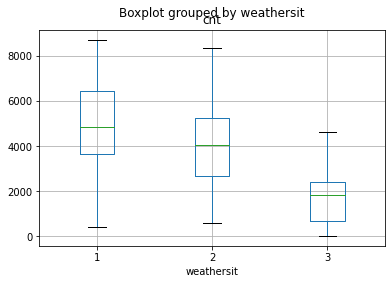

In [11]:
df.boxplot(column = ['cnt'], by = 'weathersit')

In [13]:
stats.f_oneway(df1['cnt'], df2['cnt'], df3['cnt'])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

In [14]:
result = ols('cnt ~ C(weathersit)', data = df).fit()

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           3.11e-17
Time:                        06:56:39   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85.567     56.994      0.000    4708.798    5044.774
C(weathersit)[T.2]  -840.9238    145.073     -5.797      0.000   -1125.736    -556.112
C(weathersit)[T.3] -3073.5005    410.790     -7.482      0.000   -3879.975   -2267.026
==============================================================================
Omnibus:                       38.064   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.665
Skew:                          -0.061   Prob(JB):                     0.000397
Kurtosis:                       2.293   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""